In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, 
    roc_curve, roc_auc_score
)


In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
print(df['target'].value_counts())  # 0 = malignant, 1 = benign


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

C:\Users\MUSAWENKOSI NYAWO\AppData\Local\Temp\ipykernel_9860\2382256224.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


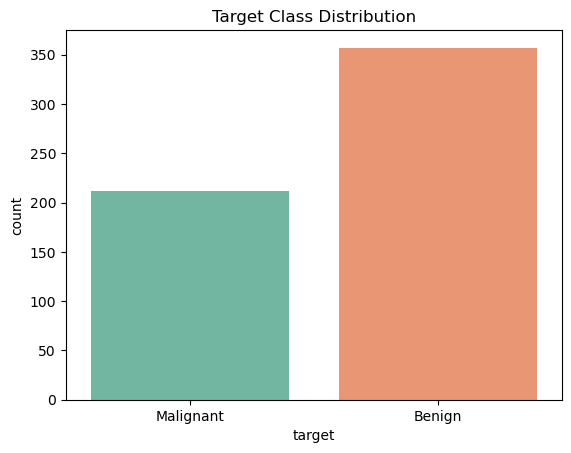

In [3]:
sns.countplot(x='target', data=df, palette='Set2')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title("Target Class Distribution")
plt.show()


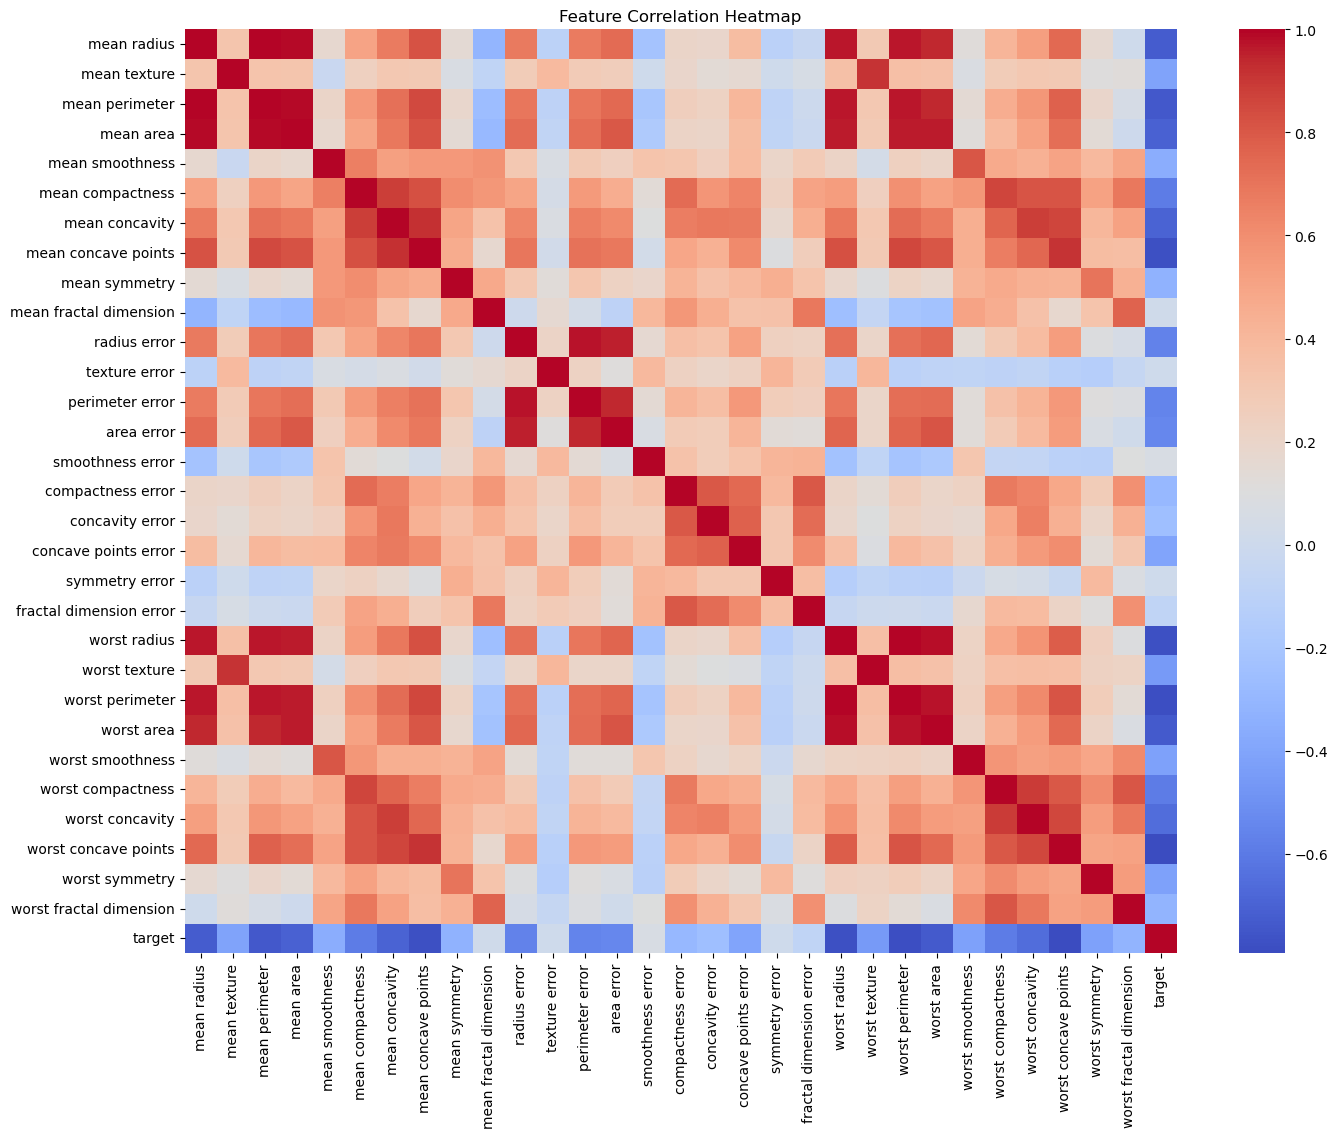

In [4]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


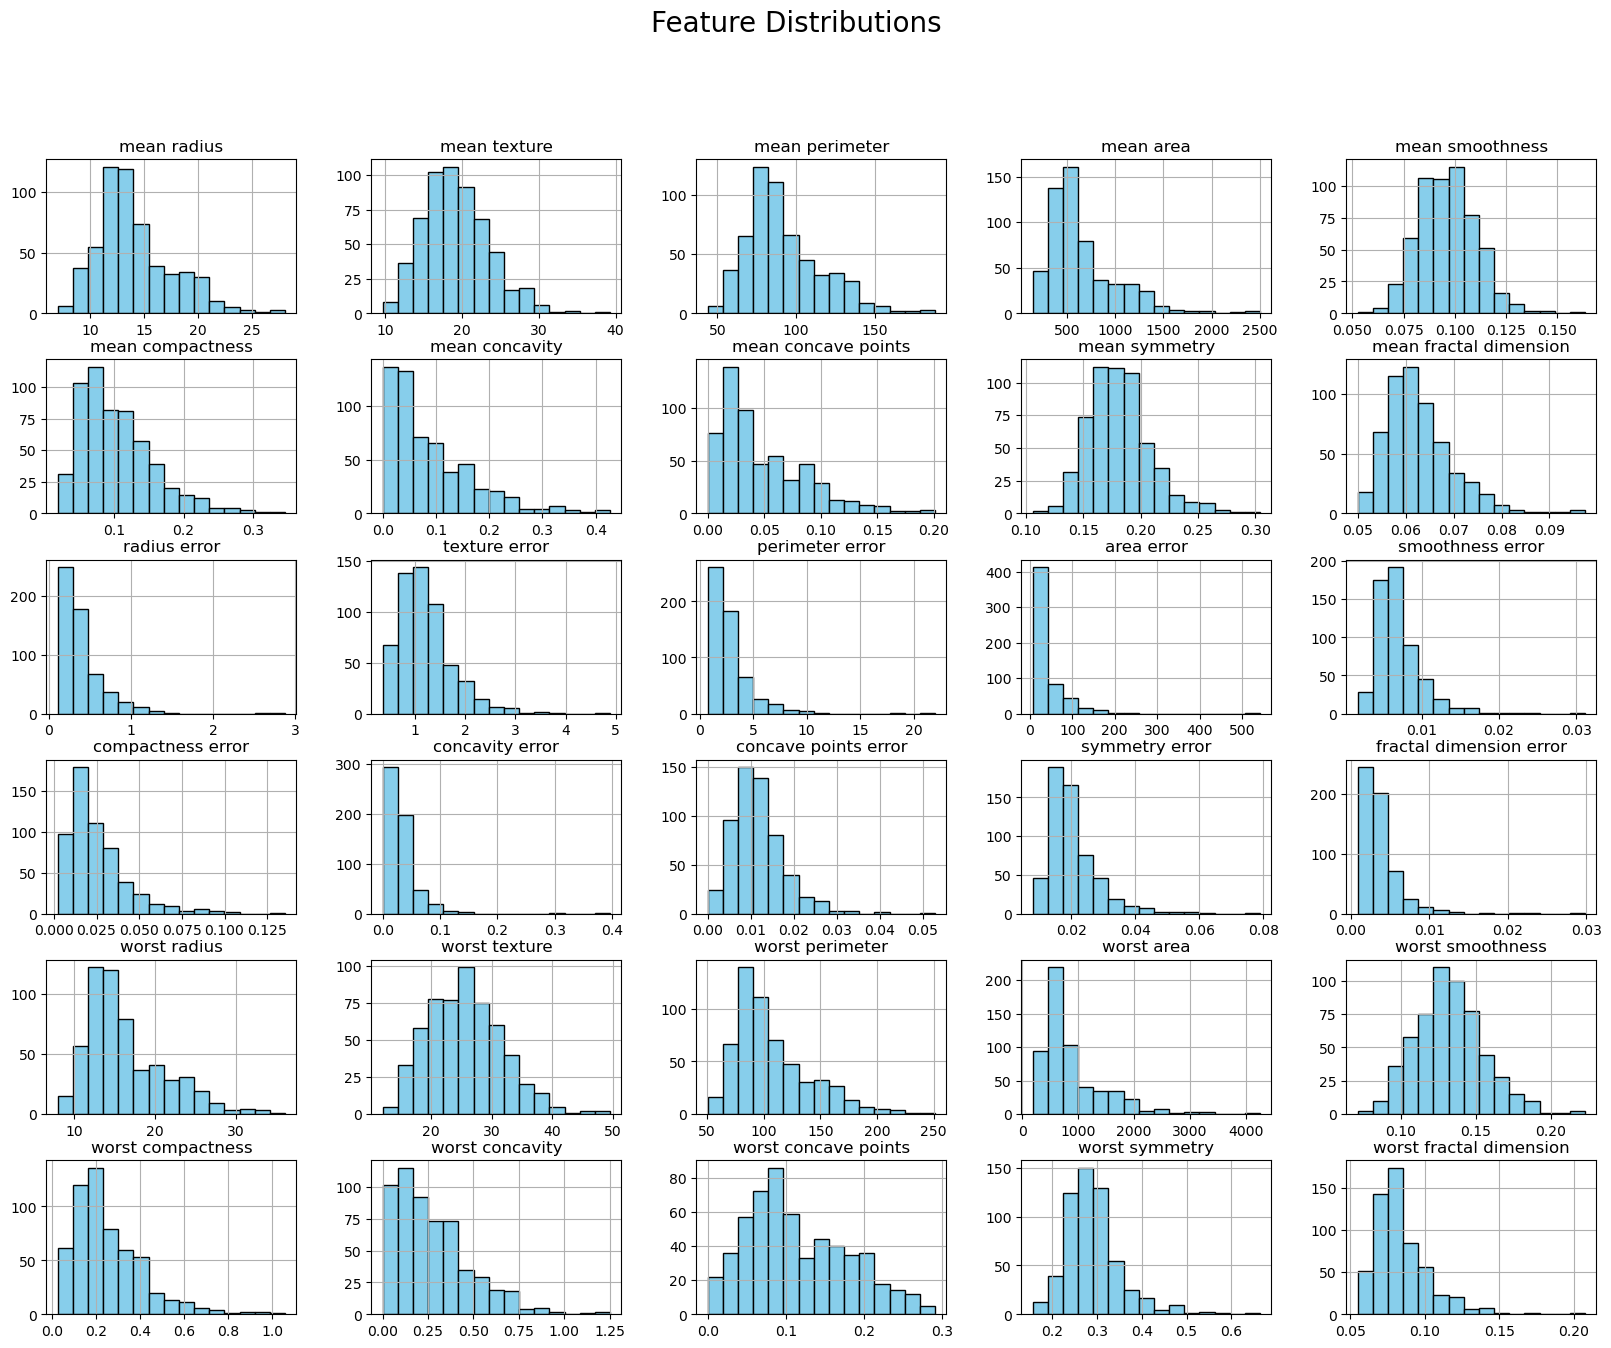

In [5]:
df.drop('target', axis=1).hist(bins=15, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=20)
plt.show()


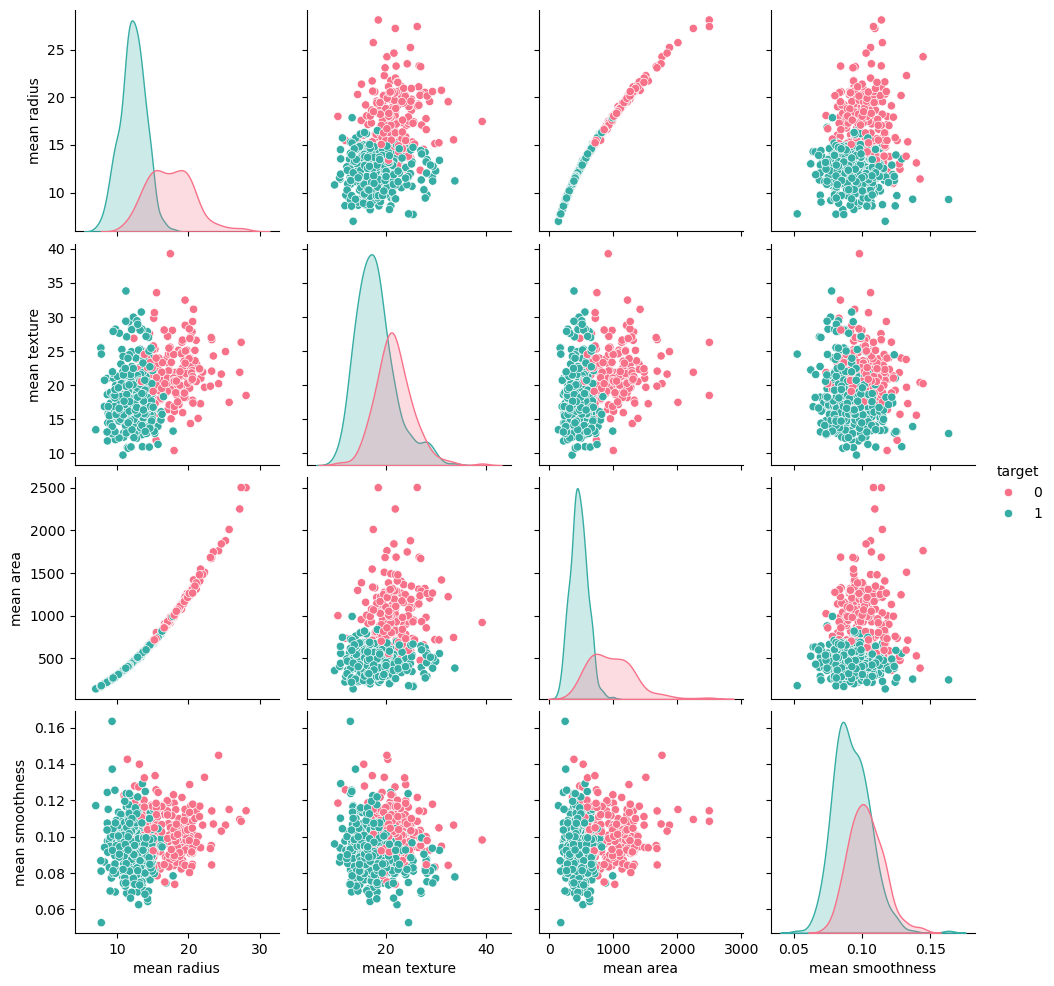

In [6]:
sns.pairplot(df[['mean radius', 'mean texture', 'mean area', 'mean smoothness', 'target']], hue='target', palette='husl')
plt.show()


In [8]:
X = df.drop('target', axis=1)
y = df['target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [9]:
param_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_lr, cv=5)
grid_lr.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [10]:
param_rf = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [100, 200]})

In [11]:
param_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
grid_svm = GridSearchCV(SVC(probability=True), param_svm, cv=5)
grid_svm.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']})

In [12]:
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]
    
    print(f"\n🔍 {name} Classification Report")
    print(classification_report(y_test, y_pred))

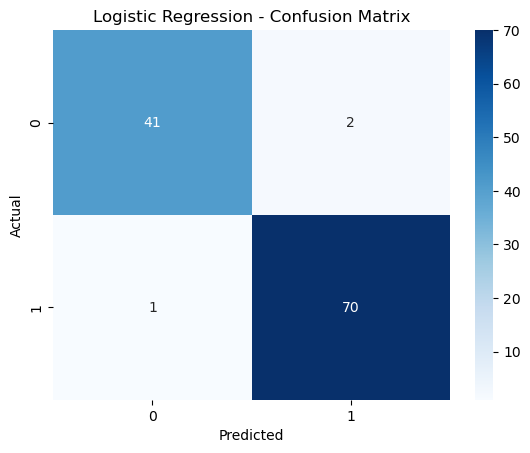

In [15]:
# Confusion Matrix for Logistic Regression
model = grid_lr.best_estimator_
name = "Logistic Regression"
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"{name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

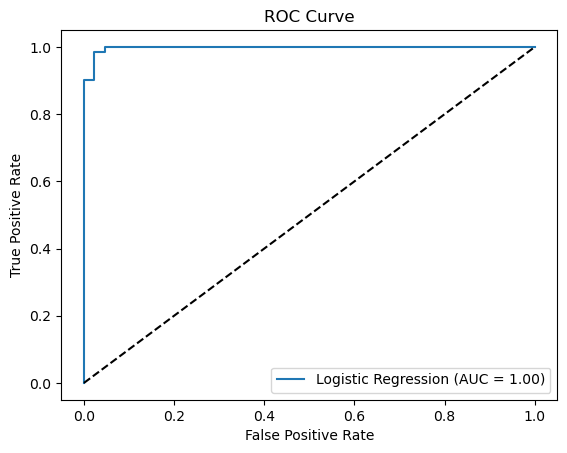

In [17]:
# ROC Curve
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [18]:
evaluate_model("Logistic Regression", grid_lr.best_estimator_)
evaluate_model("Random Forest", grid_rf.best_estimator_)
evaluate_model("SVM", grid_svm.best_estimator_)



🔍 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


🔍 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


🔍 SVM Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg   

C:\Users\MUSAWENKOSI NYAWO\AppData\Local\Temp\ipykernel_9860\3612306774.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_results, palette='Set1')


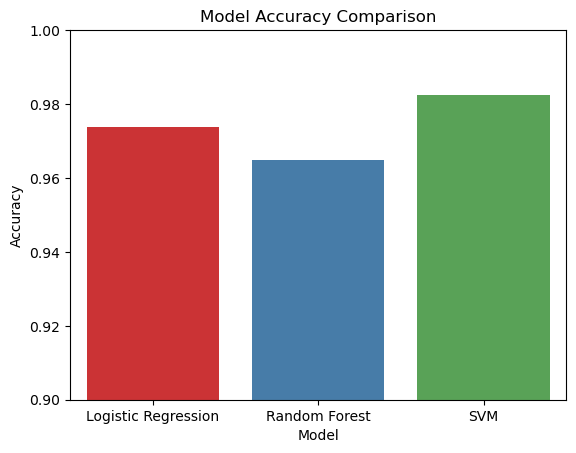

In [19]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [
        accuracy_score(y_test, grid_lr.predict(X_test)),
        accuracy_score(y_test, grid_rf.predict(X_test)),
        accuracy_score(y_test, grid_svm.predict(X_test)),
    ]
}

df_results = pd.DataFrame(results)
sns.barplot(x='Model', y='Accuracy', data=df_results, palette='Set1')
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.show()


C:\Users\MUSAWENKOSI NYAWO\AppData\Local\Temp\ipykernel_9860\417229627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='coolwarm')


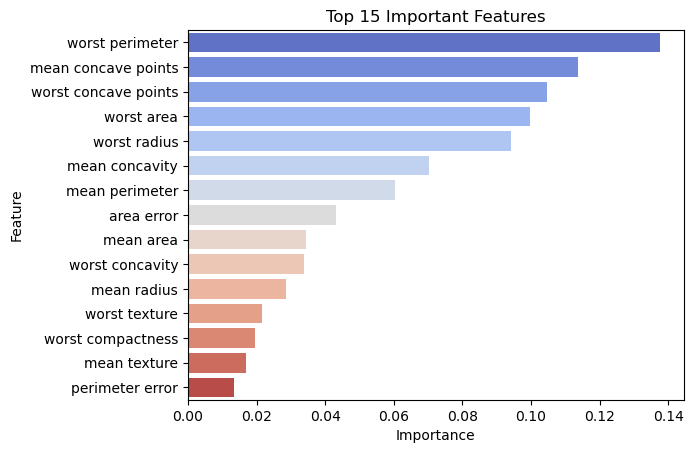

In [20]:
importances = grid_rf.best_estimator_.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df.head(15), palette='coolwarm')
plt.title("Top 15 Important Features")
plt.show()


In [21]:
import joblib

# Save the best estimator (e.g., Random Forest)
joblib.dump(grid_rf.best_estimator_, 'breast_cancer_rf_model.joblib')

# Optionally save the scaler too
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [22]:
# Load the model and scaler
model = joblib.load('breast_cancer_rf_model.joblib')
scaler = joblib.load('scaler.joblib')

# Example: Predict on new data
new_data = [[17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 
             1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 
             0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189]]

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)
print("Prediction (0 = Malignant, 1 = Benign):", prediction)


Prediction (0 = Malignant, 1 = Benign): [0]


c:\Users\MUSAWENKOSI NYAWO\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# streamlit_app.py
import streamlit as st
import joblib
import numpy as np

model = joblib.load('breast_cancer_rf_model.joblib')
scaler = joblib.load('scaler.joblib')

st.title("Breast Cancer Predictor")

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 
            'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 
            'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 
            'area error', 'smoothness error', 'compactness error', 'concavity error', 
            'concave points error', 'symmetry error', 'fractal dimension error', 
            'worst radius', 'worst texture', 'worst perimeter', 'worst area', 
            'worst smoothness', 'worst compactness', 'worst concavity', 
            'worst concave points', 'worst symmetry', 'worst fractal dimension']

input_data = []
for feat in features:
    val = st.number_input(f"{feat}", format="%.4f")
    input_data.append(val)

if st.button("Predict"):
    data_np = np.array(input_data).reshape(1, -1)
    data_scaled = scaler.transform(data_np)
    result = model.predict(data_scaled)[0]
    st.success("Prediction: **Benign**" if result == 1 else "Prediction: **Malignant**")


2025-06-11 12:03:24.836 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:03:25.374 
  command:

    streamlit run c:\Users\MUSAWENKOSI NYAWO\miniconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-11 12:03:25.375 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:03:25.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:03:25.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:03:25.380 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:03:25.393 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-11 12:03:25.395 Session st

In [ ]:
streamlit run streamlit_app.py
# To run the Streamlit app, use the command: